In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/drive/MyDrive/machine_learning/laptop_price.csv', encoding='latin-1')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
data.shape

(1303, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
data.drop(columns=['laptop_ID'], inplace=True)
data.drop(columns=['Product'], inplace=True)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [8]:
data['Ram'] = data['Ram'].str.replace('GB','')
data['Weight'] = data['Weight'].str.replace('kg','')
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [9]:
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

Data Analysis

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt

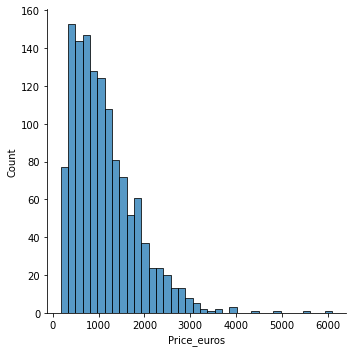

In [11]:
sb.displot(data['Price_euros'])

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

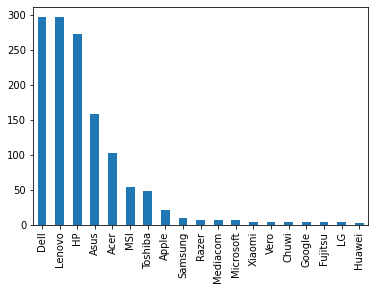

In [12]:
data['Company'].value_counts().plot(kind='bar')
data['Company'].value_counts()

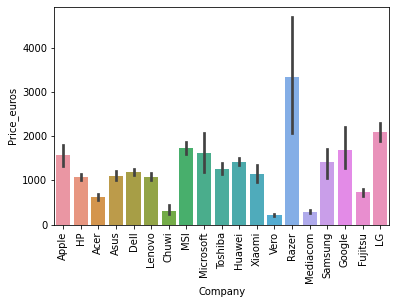

In [13]:
sb.barplot(x=data['Company'], y=data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

Rata-rata harga per brand

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

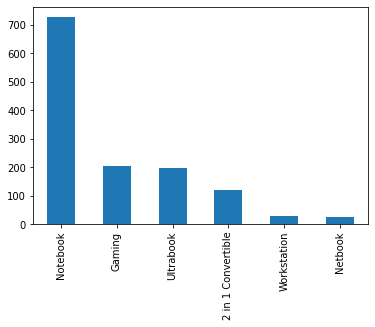

In [14]:
data['TypeName'].value_counts().plot(kind='bar')
data['TypeName'].value_counts()

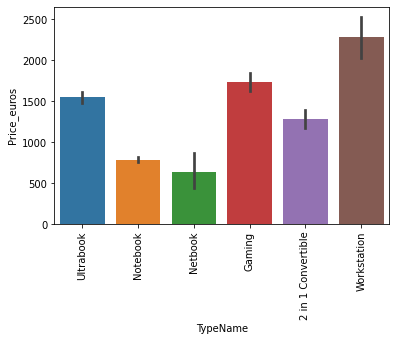

In [15]:
sb.barplot(x=data['TypeName'], y=data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

Rata-rata harga per jenis laptop

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


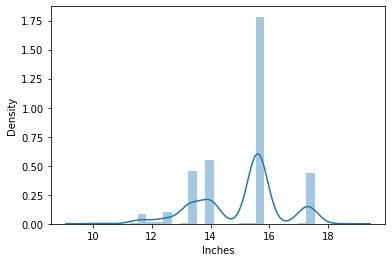

In [16]:
sb.distplot(data['Inches'])

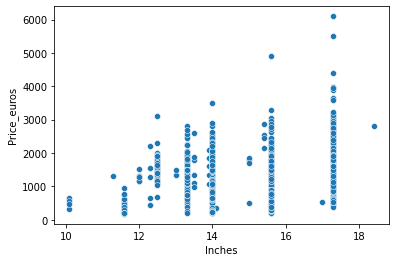

In [17]:
sb.scatterplot(x=data['Inches'], y=data['Price_euros'])

In [18]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [19]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
216,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 940MX,No OS,2.80,589.0,0
757,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.59,1561.0,0
1114,Lenovo,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel HD Graphics 400,Android,0.69,549.0,1
1076,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,4,1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.30,977.0,0
477,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,180GB SSD,Intel HD Graphics 620,Windows 10,1.70,1364.0,0


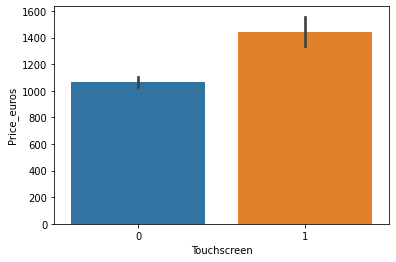

In [20]:
sb.barplot(x=data['Touchscreen'], y=data['Price_euros'])

In [21]:
data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
1077,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.78,2499.0,0,0
669,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Linux,2.10,412.0,0,0
103,HP,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,1.38,1119.0,0,1
899,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,500GB HDD,Intel HD Graphics 620,Windows 10,1.90,935.0,0,0
1241,Asus,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.45,1280.0,0,0


0    938
1    365
Name: IPS, dtype: int64

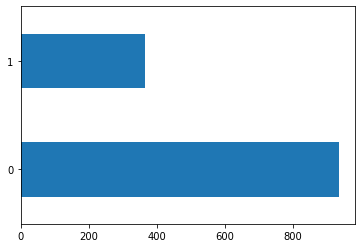

In [22]:
data['IPS'].value_counts().plot(kind='barh')
data['IPS'].value_counts()

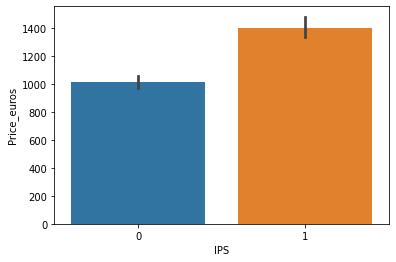

In [23]:
sb.barplot(x=data['IPS'], y=data['Price_euros'])

In [24]:
new = data['ScreenResolution'].str.split('x', n=1, expand=True)
data['X_res'] = new[0]
data['Y_res'] = new[1]
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res
104,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10 S,1.252,1340.0,1,0,Touchscreen 2256,1504
1216,Acer,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.300,598.0,0,0,1600,900
362,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,6,128GB SSD + 1TB HDD,Nvidia GeForce GTX 940MX,Windows 10,2.800,719.0,0,0,1600,900
727,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.710,649.0,1,0,Full HD / Touchscreen 1920,1080
327,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.700,1049.9,0,0,Full HD 1920,1080


In [25]:
data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'\d+\.?\d+').apply(lambda x:x[0])

In [26]:
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [27]:
data['Y_res'].value_counts()

1080    841
768     308
2160     43
1800     31
1440     31
900      27
1600     10
1504      6
1200      5
1824      1
Name: Y_res, dtype: int64

In [28]:
data['X_res'].value_counts()

1920    846
1366    308
3840     43
2560     29
3200     27
1600     23
2304      6
2256      6
1440      4
2880      4
2400      4
2160      2
2736      1
Name: X_res, dtype: int64

In [29]:
data.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_euros, dtype: float64

In [30]:
data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2) ** 0.5/data['Inches']).astype('float'))
data.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.515115
Name: Price_euros, dtype: float64

In [31]:
data.drop(columns=['ScreenResolution'], inplace=True)
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,6.553720e+06
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,2.073668e+06
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,3.686469e+06
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,8.294517e+06
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,6.553720e+06


In [32]:
data.drop(columns=['Inches', 'X_res', 'Y_res'], inplace=True)
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,6.553720e+06
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,2.073668e+06
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,3.686469e+06
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,8.294517e+06
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,6.553720e+06


In [33]:
data['Cpu Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,6.553720e+06,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,2.073668e+06,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,3.686469e+06,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,8.294517e+06,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,6.553720e+06,Intel Core i5


In [34]:
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [35]:
def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  else:
    if text.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

data['Cpu Brand'] = data['Cpu Name'].apply(fetch_processor)
data.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu Name,Cpu Brand
562,HP,Ultrabook,Intel Core M 6Y75 1.2GHz,16,512GB SSD,Intel HD Graphics 515,Windows 10,1.16,1965.00,1,1,1.024014e+07,Intel Core M,Other Intel Processor
857,HP,2 in 1 Convertible,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,2559.00,1,0,3.686481e+06,Intel Core i7,Intel Core i7
1048,Lenovo,Gaming,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.60,2289.99,0,1,3.686462e+06,Intel Core i7,Intel Core i7
680,MSI,Gaming,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.20,997.90,0,0,3.686469e+06,Intel Core i5,Intel Core i5
148,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,2029.00,0,0,3.686462e+06,Intel Core i7,Intel Core i7


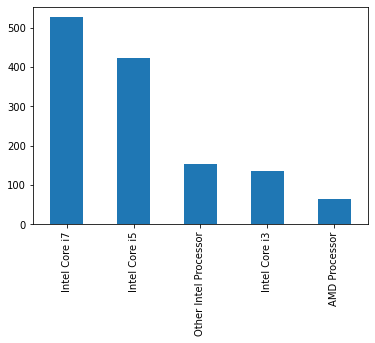

In [36]:
data['Cpu Brand'].value_counts().plot(kind='bar')

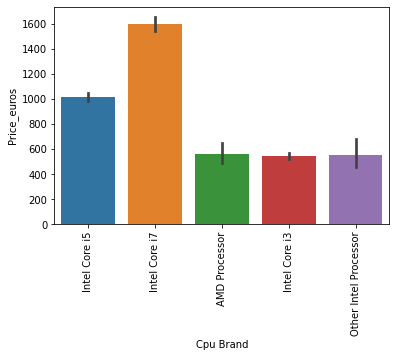

In [37]:
sb.barplot(x=data['Cpu Brand'], y=data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [38]:
data.drop(columns = ['Cpu', 'Cpu Name'], inplace=True)
data.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu Brand
1256,Asus,Gaming,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,4.00,1900.00,0,1,3.686462e+06,Intel Core i7
1289,Asus,Ultrabook,8,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,729.00,0,1,3.686481e+06,Other Intel Processor
1270,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,3.686477e+06,Intel Core i7
501,HP,Notebook,8,256GB SSD,AMD Radeon 520,Windows 10,1.91,618.99,0,0,1.866005e+06,Intel Core i5
323,HP,Notebook,8,1TB HDD,Intel UHD Graphics 620,Windows 10,2.10,902.00,0,1,1.866005e+06,Intel Core i7


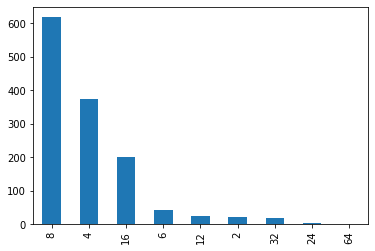

In [39]:
data['Ram'].value_counts().plot(kind='bar')

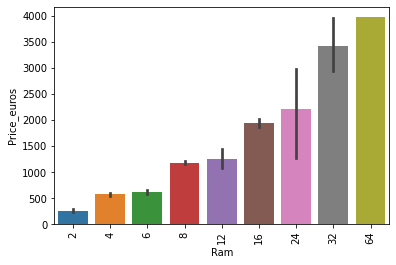

In [40]:
sb.barplot(x=data['Ram'], y=data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [41]:
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [42]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data['Memory'] = data['Memory'].str.replace('GB', '')
data['Memory'] = data['Memory'].str.replace('TB', '000')

new = data['Memory'].str.split("+", n=1, expand=True)

data["first"] = new[0]
data["first"] = data["first"].str.strip()

data["second"] = new[1]

data["Layer1HDD"] = data["first"].apply(lambda x:1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x:1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x:1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x:1 if "Flash Storage" in x else 0)

data["first"] = data["first"].str.replace(r'\D', '')

data["second"].fillna("0", inplace=True)

data["Layer2HDD"] = data["second"].apply(lambda x:1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x:1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x:1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x:1 if "Flash Storage" in x else 0)

data["second"]  = data["second"].str.replace(r'\D', '')

data["first"] = data["first"].astype('int')
data["second"] = data["second"].astype('int')

data["HDD"] = (data["first"]*data["Layer1HDD"] + data["second"]*data["Layer2HDD"])
data["SSD"] = (data["first"]*data["Layer1SSD"] + data["second"]*data["Layer2SSD"])
data["Hybrid"] = (data["first"]*data["Layer1Hybrid"] + data["second"]*data["Layer2Hybrid"])
data["Flash Storage"] = (data["first"]*data["Layer1Flash_Storage"] + data["second"]*data["Layer2Flash_Storage"])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer2HDD', 'Layer1SSD',
                   'Layer2SSD', 'Layer1Hybrid', 'Layer2Hybrid', 'Layer1Flash_Storage',
                   'Layer2Flash_Storage'], inplace=True)

<ipython-input-42-2a1cec006e30>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  data["first"] = data["first"].str.replace(r'\D', '')
<ipython-input-42-2a1cec006e30>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  data["second"]  = data["second"].str.replace(r'\D', '')


In [43]:
data.drop(columns=['Memory'], inplace=True)

In [44]:
data.sample(7)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash Storage
201,Lenovo,Notebook,4,Intel HD Graphics 520,Windows 10,2.10,493.0,0,0,1.866005e+06,Intel Core i5,0,128,0,0
105,HP,Notebook,6,Nvidia GeForce 940MX,Windows 10,1.58,659.0,0,1,3.686477e+06,Intel Core i5,0,256,0,0
969,Lenovo,Notebook,6,Nvidia GeForce 920MX,Windows 10,2.40,695.0,0,0,3.686469e+06,Intel Core i5,0,256,0,0
850,HP,Notebook,4,Intel HD Graphics 400,No OS,1.86,299.0,0,0,1.866005e+06,Other Intel Processor,0,128,0,0
270,Apple,Ultrabook,8,Intel Iris Graphics 550,macOS,1.37,1958.9,0,1,6.553720e+06,Intel Core i5,0,512,0,0
1068,Dell,Gaming,16,Nvidia GeForce GTX 970M,Windows 10,3.21,1329.0,0,0,1.474574e+07,Intel Core i7,1000,256,0,0
593,Samsung,Notebook,16,Nvidia GeForce GTX 1050,Windows 10,2.50,1699.0,0,0,3.686469e+06,Intel Core i7,1000,128,0,0


In [45]:
data.corr()['Price_euros']

Ram              0.743007
Weight           0.210370
Price_euros      1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.515115
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash Storage   -0.040511
Name: Price_euros, dtype: float64

In [46]:
data.drop(columns=['Hybrid', 'Flash Storage'], inplace=True)
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,6.553720e+06,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,2.073668e+06,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,3.686469e+06,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,8.294517e+06,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,6.553720e+06,Intel Core i5,0,256


In [47]:
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [48]:
data['Gpu Brand'] = data['Gpu'].apply(lambda x:x.split()[0])
data.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand
627,Lenovo,Notebook,4,Intel HD Graphics 620,No OS,2.20,468.0,0,0,3.686469e+06,Intel Core i5,0,128,Intel
517,Asus,Gaming,24,Nvidia GeForce GTX1080,Windows 10,2.24,2968.0,0,0,3.686469e+06,Intel Core i7,0,512,Nvidia
721,HP,2 in 1 Convertible,8,Intel HD Graphics 620,Windows 10,1.58,836.6,1,1,1.866014e+06,Intel Core i5,0,256,Intel
977,Asus,2 in 1 Convertible,16,Nvidia GeForce GTX 950M,Windows 10,2.30,1799.0,1,0,1.474574e+07,Intel Core i7,2000,512,Nvidia
1046,HP,Notebook,8,Intel HD Graphics 520,Windows 7,1.43,1469.0,0,0,3.686477e+06,Intel Core i5,0,256,Intel


In [49]:
data['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

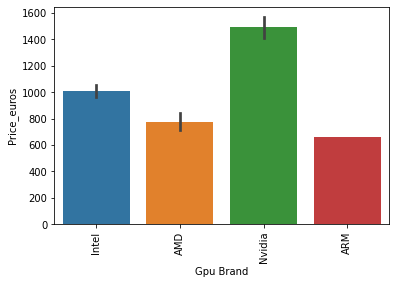

In [50]:
sb.barplot(x=data['Gpu Brand'], y=data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
data.drop(columns=['Gpu'], inplace=True)
data.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand
285,Acer,Notebook,12,Windows 10,2.15,659.0,1,1,3.686469e+06,Intel Core i7,1000,0,Intel
1052,Dell,2 in 1 Convertible,8,Windows 10,2.30,1094.0,1,1,3.686469e+06,Intel Core i5,0,256,Intel
566,Dell,Notebook,4,Windows 10,1.93,959.0,0,0,1.866005e+06,Intel Core i5,500,0,Intel
462,Asus,Notebook,8,Windows 10,2.37,749.0,0,0,3.686469e+06,Intel Core i5,1000,0,Intel
532,Asus,Notebook,8,Windows 10,2.00,1299.0,0,1,1.474574e+07,Intel Core i7,1000,256,Nvidia


In [52]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

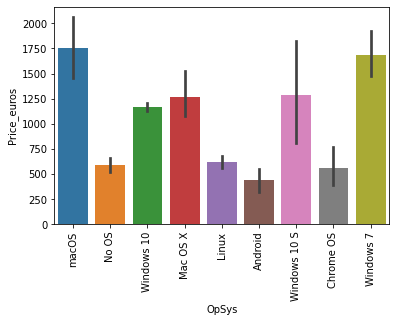

In [53]:
sb.barplot(x=data['OpSys'], y=data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
def op_sys(inp):
  if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
    return 'Windows'
  elif inp == 'macOS' or inp == 'Mac OS X':
    return 'Mac'
  else:
    return 'Other/No OS/Linux'

data['OS'] = data['OpSys'].apply(op_sys)
data.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand,OS
771,Samsung,2 in 1 Convertible,16,Windows 10,1.71,1799.00,1,0,3.686472e+06,Intel Core i7,0,256,AMD,Windows
851,Asus,Gaming,16,Windows 10,2.10,1899.00,0,0,3.686469e+06,Intel Core i7,1000,128,Nvidia,Windows
855,Dell,Notebook,8,Windows 10,1.90,945.00,0,0,3.686469e+06,Intel Core i5,0,128,Intel,Windows
491,Toshiba,Ultrabook,32,Windows 10,1.05,2799.00,1,0,3.686481e+06,Intel Core i7,0,512,Intel,Windows
1008,HP,Notebook,8,Windows 10,1.64,1049.26,0,0,3.686477e+06,Intel Core i5,0,256,Nvidia,Windows


In [55]:
data.drop(columns=['OpSys'], inplace=True)
data.sample(5)

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand,OS
367,Lenovo,Gaming,8,2.40,809.00,0,1,3.686469e+06,Intel Core i5,1000,128,Nvidia,Other/No OS/Linux
1152,Lenovo,Notebook,8,2.32,599.00,0,0,3.686469e+06,Intel Core i5,1000,0,AMD,Other/No OS/Linux
57,Asus,Notebook,4,2.00,586.19,0,0,1.866005e+06,Intel Core i5,0,256,Intel,Windows
147,Asus,Notebook,4,2.00,344.00,0,0,3.686469e+06,Other Intel Processor,1000,0,Intel,Windows
134,HP,Notebook,8,2.05,598.00,0,0,1.866005e+06,Intel Core i7,1000,0,Intel,Windows


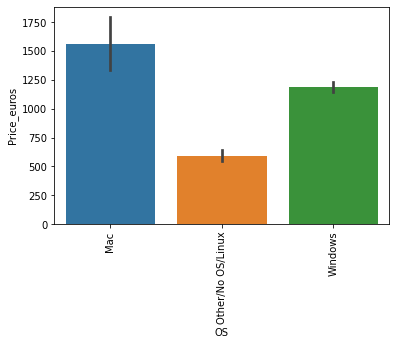

In [56]:
sb.barplot(x=data['OS'], y=data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


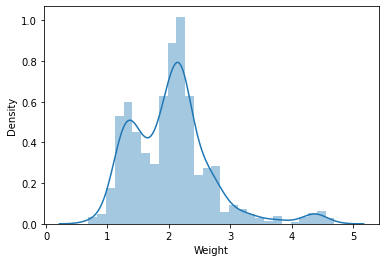

In [57]:
sb.distplot(data['Weight'])

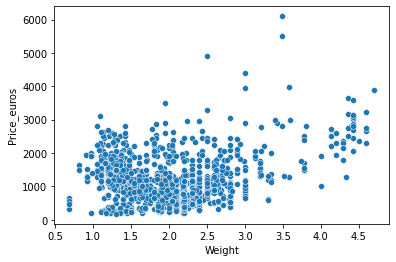

In [58]:
sb.scatterplot(x=data['Weight'], y=data['Price_euros'])

In [59]:
data.corr()['Price_euros']

Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
ppi            0.515115
HDD           -0.096441
SSD            0.670799
Name: Price_euros, dtype: float64

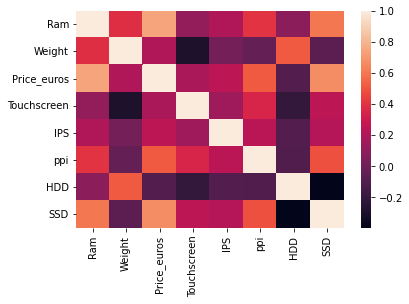

In [60]:
sb.heatmap(data.corr())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


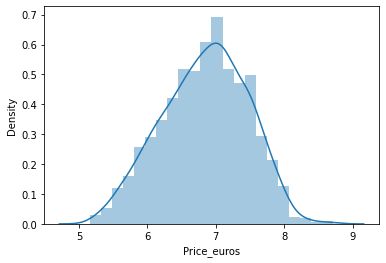

In [61]:
sb.distplot(np.log(data['Price_euros']))

In [62]:
X = data.drop(columns=['Price_euros'])
y = np.log(data['Price_euros'])

In [63]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,6.553720e+06,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,2.073668e+06,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,3.686469e+06,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,8.294517e+06,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,6.553720e+06,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,3.686477e+06,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,1.024014e+07,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,1.866011e+06,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,1.866005e+06,Intel Core i7,1000,0,AMD,Windows


In [64]:
y

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1298    6.458338
1299    7.312553
1300    5.433722
1301    6.638568
1302    5.910797
Name: Price_euros, Length: 1303, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [66]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand,OS
183,Toshiba,Notebook,8,2.00,0,0,1.866005e+06,Intel Core i5,0,128,Intel,Windows
699,HP,Notebook,4,2.10,0,1,3.686469e+06,Intel Core i7,500,0,AMD,Windows
419,Lenovo,Ultrabook,8,1.75,0,1,3.686477e+06,Intel Core i7,0,256,AMD,Windows
997,Acer,Notebook,4,2.40,0,0,1.866005e+06,Other Intel Processor,500,0,Intel,Windows
502,Lenovo,2 in 1 Convertible,8,1.40,1,1,3.686478e+06,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,1.866005e+06,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,3.686469e+06,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,1.866005e+06,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,1.866005e+06,Intel Core i3,2000,0,Nvidia,Other/No OS/Linux


**Training Model dengan Linear Regression**

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [68]:
# Linear Regression
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

#Tes akurasi dengan RSquare dan Mean Absolute Error
print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8166648348701527
MAE 0.21387925862414395


In [69]:
# Export Model
import pickle

pickle.dump(data, open('data.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [70]:
data

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,1339.69,0,1,6.553720e+06,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,2.073668e+06,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,3.686469e+06,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,8.294517e+06,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,6.553720e+06,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,638.00,1,1,3.686477e+06,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1499.00,1,1,1.024014e+07,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,229.00,0,0,1.866011e+06,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,764.00,0,0,1.866005e+06,Intel Core i7,1000,0,AMD,Windows


In [71]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand,OS
183,Toshiba,Notebook,8,2.00,0,0,1.866005e+06,Intel Core i5,0,128,Intel,Windows
699,HP,Notebook,4,2.10,0,1,3.686469e+06,Intel Core i7,500,0,AMD,Windows
419,Lenovo,Ultrabook,8,1.75,0,1,3.686477e+06,Intel Core i7,0,256,AMD,Windows
997,Acer,Notebook,4,2.40,0,0,1.866005e+06,Other Intel Processor,500,0,Intel,Windows
502,Lenovo,2 in 1 Convertible,8,1.40,1,1,3.686478e+06,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,1.866005e+06,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,3.686469e+06,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,1.866005e+06,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,1.866005e+06,Intel Core i3,2000,0,Nvidia,Other/No OS/Linux


In [72]:
y_train

183     6.675823
699     6.535241
419     7.102812
997     5.940171
502     7.377134
          ...   
466     6.150603
299     7.291656
493     6.361302
527     6.129050
1192    6.184149
Name: Price_euros, Length: 1107, dtype: float64